#### load in modules

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#### read in an adjlist file

In [104]:
# read in adjlist file for periodic lattice graph generated previously
periodic_lattice_G = nx.read_adjlist("./aperiodic_lattice.adjlist")
# relabel nodes as integers
mapping = { node: int(node) for node in periodic_lattice_G.nodes }
periodic_lattice_G = nx.relabel_nodes(periodic_lattice_G, mapping)

#### simulate outbreaks

In [105]:
# simulate a simple outbreak on a graph until a certain proportion of nodes are infected
def simulate_binary_outbreak(graph, end_p, transmission_p=0.1, seed=None):
    """Simulate a simple outbreak on a graph until a certain proportion of nodes are infected."""
    # set initial infected nodes
    rng = np.random.default_rng(seed)
    initial_infected_nodes = rng.choice(graph.nodes, size=1, replace=False)
    # construct infection_states
    infection_states = [1 if node in initial_infected_nodes else 0 for node in range(len(graph.nodes))]

    # simulate outbreak
    infection_states_history = { 0: infection_states.copy() }
    t = 1
    stop_simulation = False
    while True:
        # check if there are still infected nodes
        if 0 not in infection_states:
            break
        # get infected nodes
        infected_nodes = [node for node, infection_state in enumerate(infection_states) if infection_state == 1]
        for infected_node in infected_nodes:
            # get neighbors of infected node
            for neighbor in graph.neighbors(infected_node):
                # update infection_states probabilistically
                if infection_states[neighbor] == 0 and rng.random() < transmission_p:
                    infection_states[neighbor] = 1
                    # check if proportion of infected nodes is greater than end_p
                    if sum(infection_states) / len(graph.nodes) >= end_p:
                        stop_simulation = True
                        break
            if stop_simulation:
                break
        
        # store infection states
        infection_states_history[t] = infection_states.copy()
        # increment time
        t += 1

        if stop_simulation:
            break

    return infection_states_history

In [106]:
# parameters
end_p = 0.5
seed = 12345
infection_states_history = simulate_binary_outbreak(periodic_lattice_G, end_p, transmission_p=0.1, seed=seed)

#### visualise outbreak history

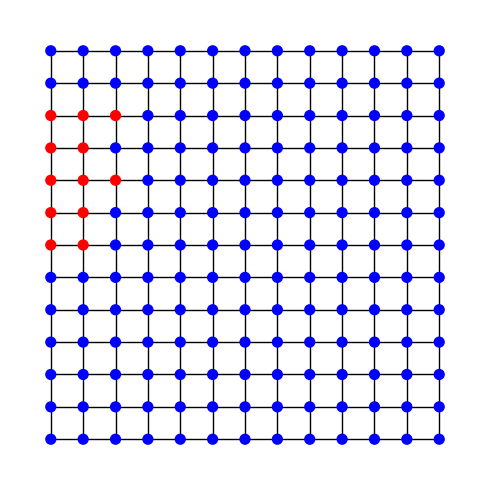

In [110]:
# plot graph with nodes coloured by infection state
dim = 13
pos = { node: (node % dim, node // dim) for node in periodic_lattice_G.nodes }
fig, ax = plt.subplots(figsize=(5, 5))
# extract infection state at some time
time_to_plot = 15
infection_states = infection_states_history[time_to_plot]
nx.draw(periodic_lattice_G, pos, with_labels=False, node_size=50,
        node_color=[('red' if infection_states[node] == 1 else 'blue') for node in periodic_lattice_G.nodes], ax=ax)

# tight layout
plt.tight_layout()

plt.show()

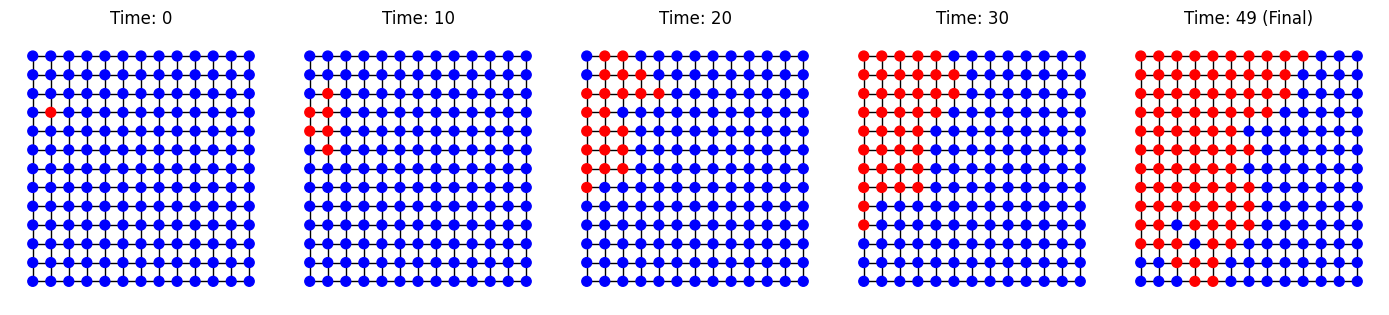

In [111]:
# do something similar to above, but multiple subplots for different times
fig, axs = plt.subplots(1, 5, figsize=(14, 3.25))
times_to_plot = [0, 10, 20, 30]
for i, time_to_plot in enumerate(times_to_plot):
    infection_states = infection_states_history[time_to_plot]
    ax = axs[i]
    nx.draw(periodic_lattice_G, pos, with_labels=False, node_size=50,
        node_color=[('red' if infection_states[node] == 1 else 'blue') for node in periodic_lattice_G.nodes], ax=ax)
    ax.set_title(f"Time: {time_to_plot}")

# plot final state
ax = axs[-1]
infection_states = infection_states_history[max(infection_states_history.keys())]
nx.draw(periodic_lattice_G, pos, with_labels=False, node_size=50, 
        node_color=[('red' if infection_states[node] == 1 else 'blue') for node in periodic_lattice_G.nodes], ax=ax)
ax.set_title(f"Time: {max(infection_states_history.keys())} (Final)")

# tight layout
plt.tight_layout()

plt.show()

#### export relabelled graph

In [ ]:
# export relabelled graph
nx.write_adjlist(periodic_lattice_G, './aperiodic_lattice.relabelled.adjlist')